## Best classification model for cardio vascular disease prediction 

#### Import needed libraries and dataset

In [317]:
# Import libraries

import pandas as pd
import numpy as np
from scipy import stats

from itertools import combinations

import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')



from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler




C:\Users\ddash\AppData\Local\Temp\ipykernel_1660\2554368263.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Exploratory data analysis

In [318]:
df  = pd.read_csv('cardio_data_processed.csv')
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_years        bmi           bp_category  \
0     0       1       0         50  21.967120  Hypertension Stage 1   
1     0       1       1         55  34.927679  Hypertension Stage 2   
2     0       0       1         51  23.507805  Hypertension Stage 1   
3     0       1       1         48  28.710479  Hypertension Stage 2   
4     0       0       0         47  23.011177                Normal   

    bp_category_encoded  
0  Hypertension Stage 1  
1  Hypertension Stage 2  
2  Hypertension Stage 1  
3  Hypertension Stage 2  
4                Normal

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

Lets check the data for NA

In [320]:
df.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

Check the data for duplicates

In [321]:
# Checking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [322]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [323]:
df.describe()

id           age        gender        height        weight  \
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000   
mean   49972.410498  19462.667737      1.348625    164.372861     74.100688   
std    28852.138290   2468.381854      0.476539      8.176756     14.288862   
min        0.000000  10798.000000      1.000000     55.000000     11.000000   
25%    24991.000000  17656.000000      1.000000    159.000000     65.000000   
50%    50008.000000  19700.000000      1.000000    165.000000     72.000000   
75%    74878.000000  21323.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000   
mean     126.434924     81.263925      1.363243      1.225174      0.087662   
std       15.961685      9.143985      0.678080      0.571288      0.282805   
min       90.000000     60.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      1.000000      1.000000      0.000000   
max      180.000000    120.000000      3.000000      3.000000      1.000000   

               alco        active        cardio     age_years           bmi  
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000  
mean       0.053134      0.803548      0.493688     52.823635     27.510513  
std        0.224302      0.397317      0.499964      6.769909      6.026497  
min        0.000000      0.000000      0.000000     29.000000      3.471784  
25%        0.000000      1.000000      0.000000     48.000000     23.875115  
50%        0.000000      1.000000      0.000000     53.000000     26.346494  
75%        0.000000      1.000000      1.000000     58.000000     30.116213  
max        1.000000      1.000000      1.000000     64.000000    298.666667

Let us first see the distribution of the target column

Text(0.5, 0, '0: No disease, 2: Has disease')

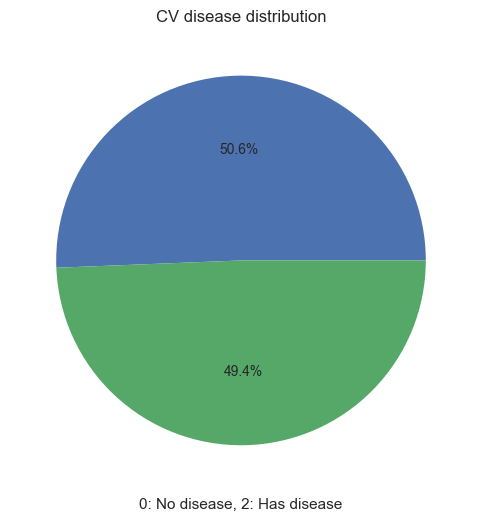

In [324]:
plt.figure(figsize=(10,6))
plt.pie(df['cardio'].value_counts(),autopct='%1.1f%%')
plt.title("CV disease distribution")
plt.xlabel('0: No disease, 2: Has disease')

The target is almost perfectly balanced so we won't have to worry about unbalanced data nor apply some of the balancing techniques. 

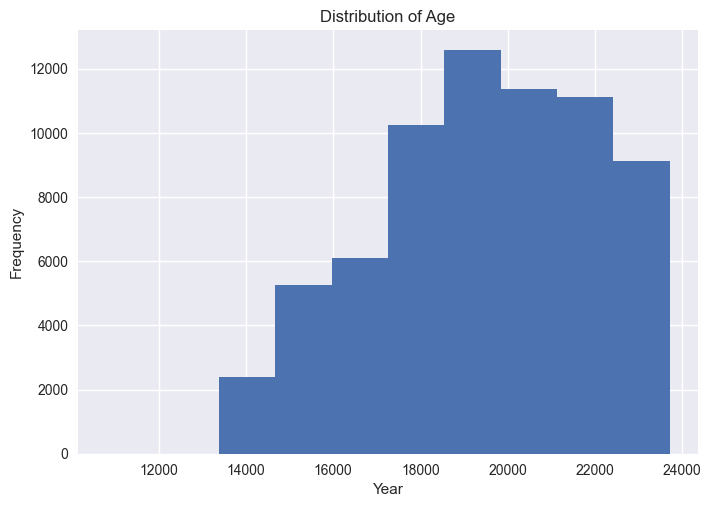

In [325]:
# Visualize yr_renovated post 1900 (to not show all the 0 values)
df['age'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of Age")
plt.show()

Lets divide the histogram further by the target

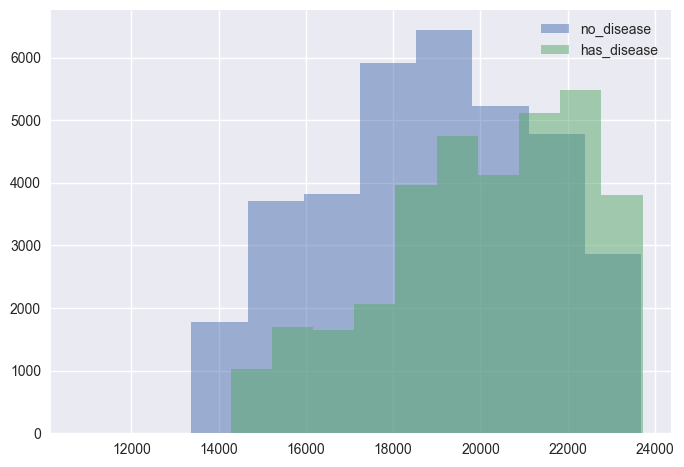

In [326]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']


plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [327]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']

has_disease.mean() - no_disease.mean() 

1180.1302938790323

In [328]:
no_disease.describe()

count    34533.000000
mean     18880.051400
std       2471.865669
min      10798.000000
25%      16840.000000
50%      19004.000000
75%      20868.000000
max      23678.000000
Name: age, dtype: float64

In [329]:
has_disease.describe()

count    33672.000000
mean     20060.181694
std       2317.385090
min      14275.000000
25%      18387.000000
50%      20387.500000
75%      21902.000000
max      23713.000000
Name: age, dtype: float64

We can see that on average the people with CV diseases are older by 1180 days, which is approximately 3.24 years. When comparing the minimal values we see that the no disease group has a larger range in age and a corresponding higher SD. Let us see the left-hand tail of the histogramm 

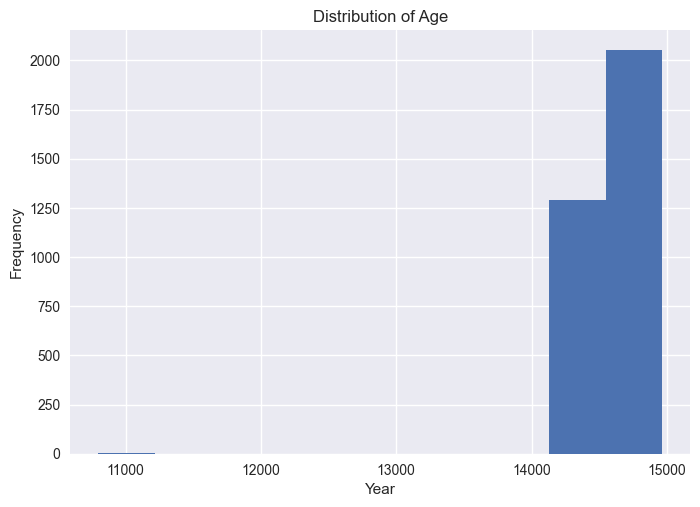

In [330]:
df[df['age'] < 15000]['age'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of Age")
plt.show()

In [331]:
df[df['age'] < 14000]['age']

6057     10878
21765    10798
29871    10859
54477    10964
Name: age, dtype: int64

And we find our outliers, 4 case with age less then 11 000 days. We should remove these manually. We could apply a function for the age column to remove all entries where the value - mean > 3 x SD. But this will only partially work since for value 10798,  the mean(19462.667737) - 10798 is 8,664.67, while the 3 x SD is 86,556.41, but such are rule would not remove the other three, since their mean - value difference is less then 3 times the SD. Visually these for rows go together so it makes sense to remove all of them. 

In [332]:
df = df[df['age'] > 11000]

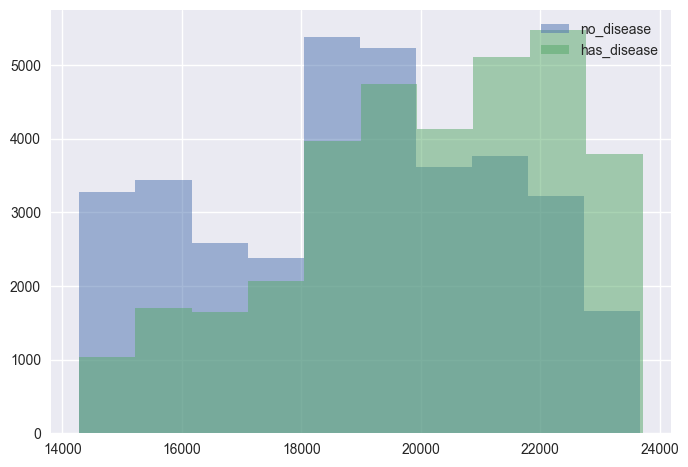

In [333]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']


plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [334]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']

has_disease.mean() - no_disease.mean() 

1179.2029225216102

In [335]:
no_disease.describe()

count    34529.000000
mean     18880.978771
std       2470.506499
min      14282.000000
25%      16840.000000
50%      19005.000000
75%      20869.000000
max      23678.000000
Name: age, dtype: float64

In [336]:
has_disease.describe()

count    33672.000000
mean     20060.181694
std       2317.385090
min      14275.000000
25%      18387.000000
50%      20387.500000
75%      21902.000000
max      23713.000000
Name: age, dtype: float64

Even though we removed our outliers there is still a 3.2 year difference between the means. next question is: is this difference a problem, a.k.a. is it significant. Lets do a t-test on the two age groups with and without cv diseases. 

Check the homogeneity and normality assumptions. 

In [337]:
stats.levene(has_disease, no_disease)

LeveneResult(statistic=253.626236466137, pvalue=5.331743072405681e-57)

In [338]:
stats.shapiro(has_disease)

C:\Users\ddash\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9595994353294373, pvalue=0.0)

In [339]:
stats.shapiro(no_disease)

ShapiroResult(statistic=0.9695902466773987, pvalue=0.0)

In [340]:
stats.ttest_ind(no_disease, has_disease)

TtestResult(statistic=-64.25531452400004, pvalue=0.0, df=68199.0)

So me learn that our data is bias in terms of age, older people have cv-diseases. This might be due to the fact that such conditions are more frequently diagnosed with the increase of age. Never the less it is a drawback of the dataset that we need to be aware of.  

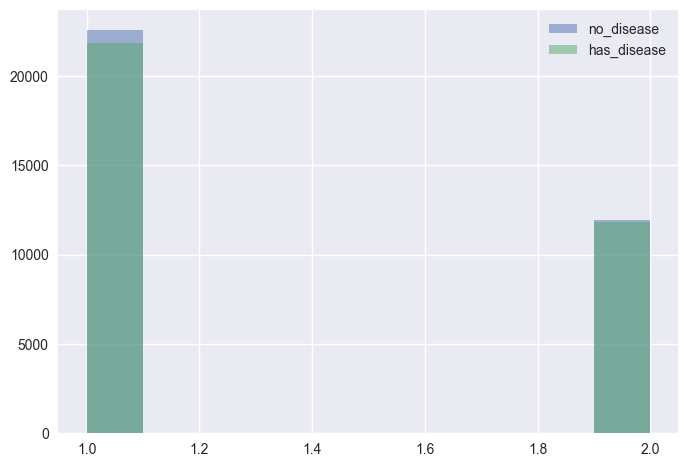

In [341]:
no_disease = df[df['cardio'] == 0]['gender']
has_disease = df[df['cardio'] == 1]['gender']


plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

The data is also bias in terms of gender, but the good news is that the distribution is the same for both values of our target (the no disease and has disease groups)

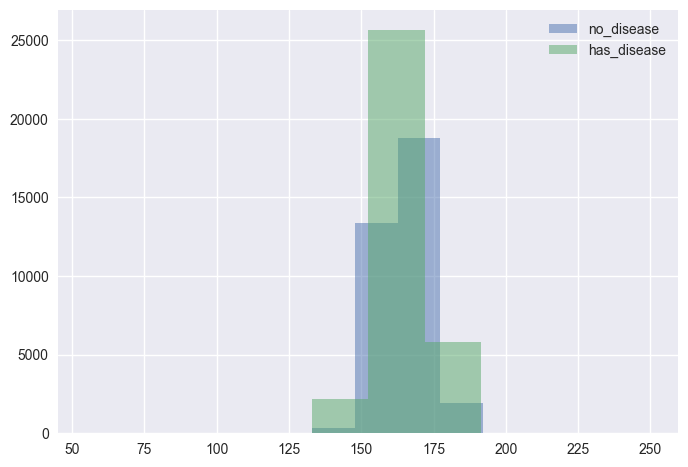

In [342]:
no_disease = df[df['cardio'] == 0]['height']
has_disease = df[df['cardio'] == 1]['height']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

On average people with cv diseases are taller, but this most likely is due to the well known correlation of height with weight, which inturn is a variable related with factors such as obesity  

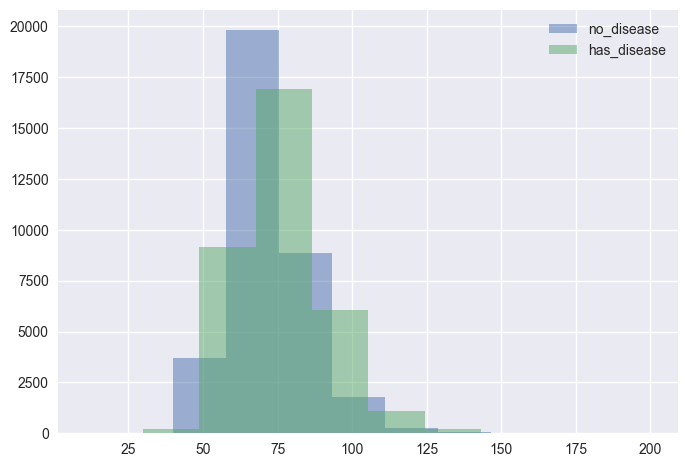

In [343]:
no_disease = df[df['cardio'] == 0]['weight']
has_disease = df[df['cardio'] == 1]['weight']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

Indeed people with cv diseases are heavier on average, there might be some outliers her as well as in the height column lets apply the 3 X SD rule for this two variables

In [344]:
def remove_outliers(df,variables):
    '''removes entries with z-score above 3 for specific columns'''
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [345]:
df = remove_outliers(df,['height', 'weight'])

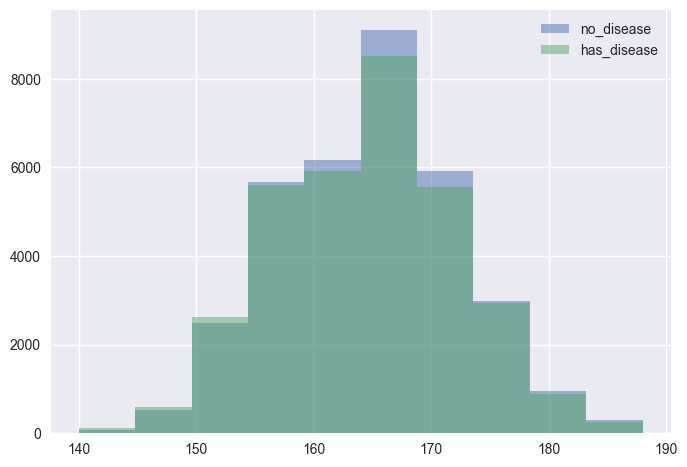

In [346]:
no_disease = df[df['cardio'] == 0]['height']
has_disease = df[df['cardio'] == 1]['height']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

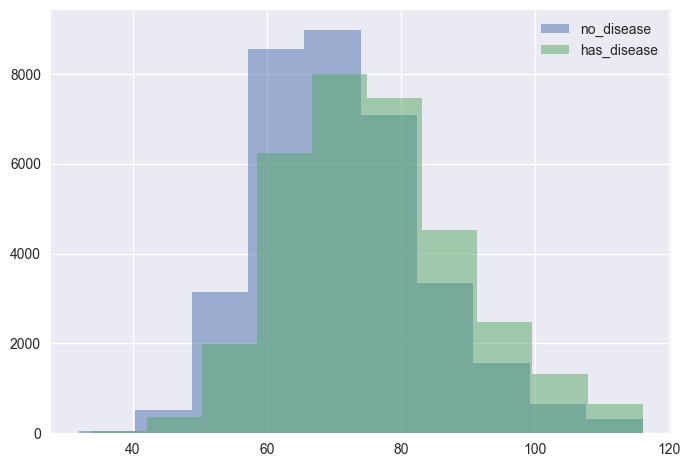

In [347]:
no_disease = df[df['cardio'] == 0]['weight']
has_disease = df[df['cardio'] == 1]['weight']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

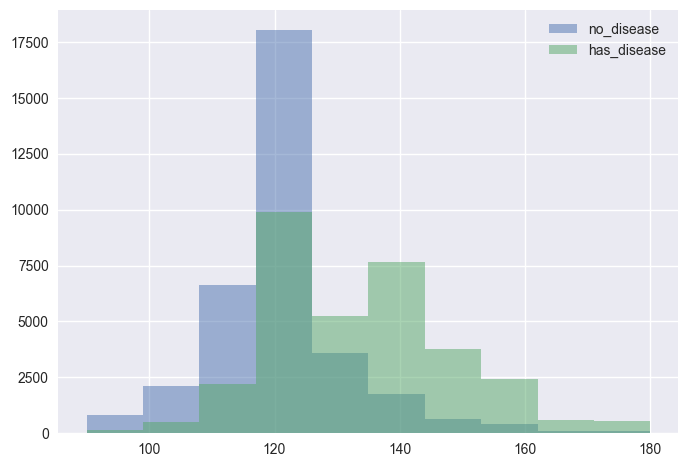

In [348]:
no_disease = df[df['cardio'] == 0]['ap_hi']
has_disease = df[df['cardio'] == 1]['ap_hi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

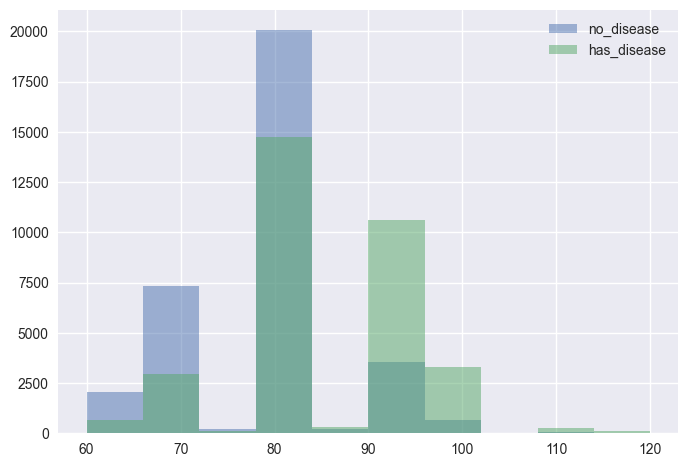

In [349]:
no_disease = df[df['cardio'] == 0]['ap_lo']
has_disease = df[df['cardio'] == 1]['ap_lo']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

These are the upper and lower ranges of the blood pressure. Let see if we can derive a column from them that will give the range.

In [350]:
df['ap_range'] = df['ap_hi'] - df['ap_lo']

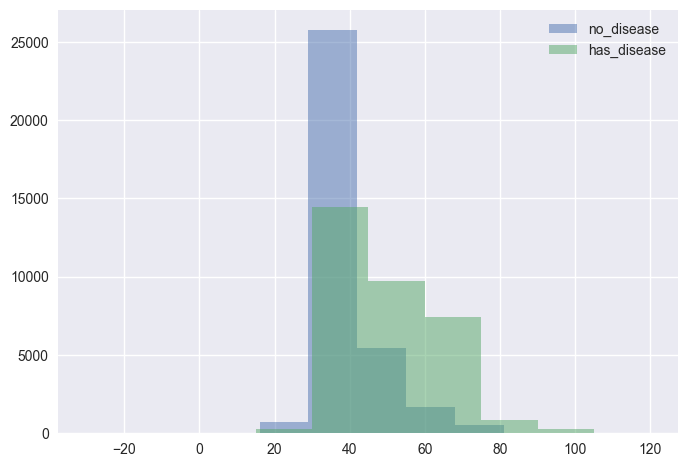

In [351]:
no_disease = df[df['cardio'] == 0]['ap_range']
has_disease = df[df['cardio'] == 1]['ap_range']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

This variable looks more meaningful in comparison to ap_lo, although we will latter see if it is more informative then ap_hi. Lets clean the arterial pressure variables from outliers using our function. 

In [352]:
df = remove_outliers(df,['ap_lo', 'ap_hi', 'ap_range'])

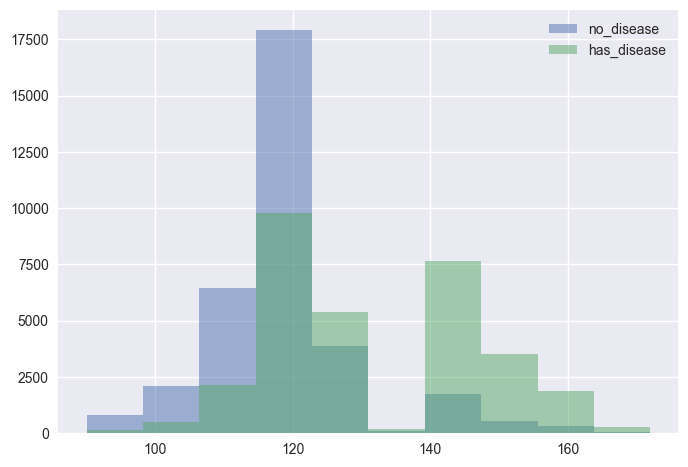

In [353]:
no_disease = df[df['cardio'] == 0]['ap_hi']
has_disease = df[df['cardio'] == 1]['ap_hi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

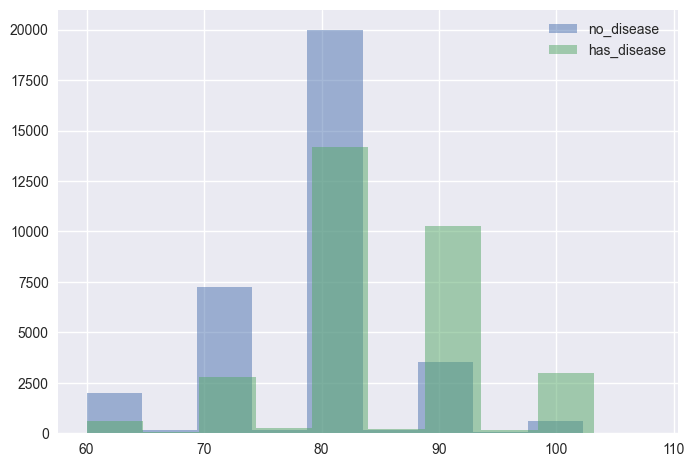

In [354]:
no_disease = df[df['cardio'] == 0]['ap_lo']
has_disease = df[df['cardio'] == 1]['ap_lo']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

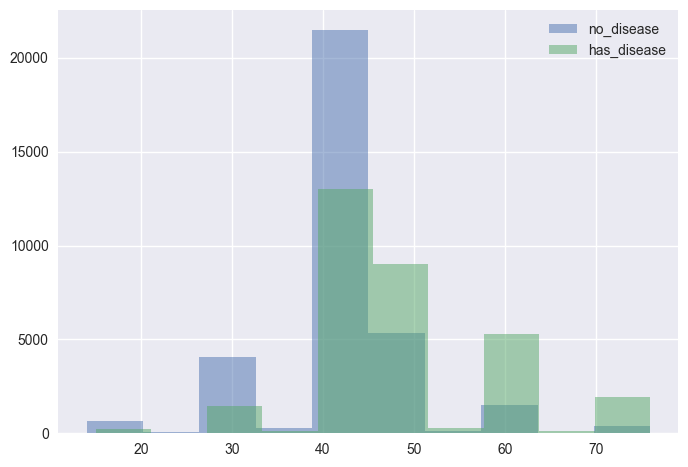

In [355]:
no_disease = df[df['cardio'] == 0]['ap_range']
has_disease = df[df['cardio'] == 1]['ap_range']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

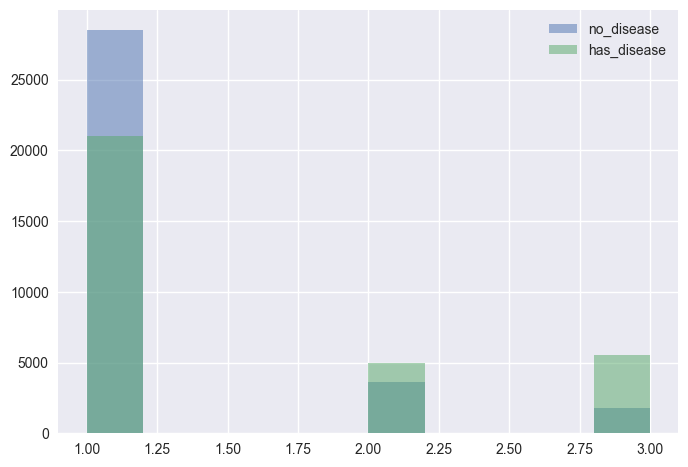

In [356]:
no_disease = df[df['cardio'] == 0]['cholesterol']
has_disease = df[df['cardio'] == 1]['cholesterol']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

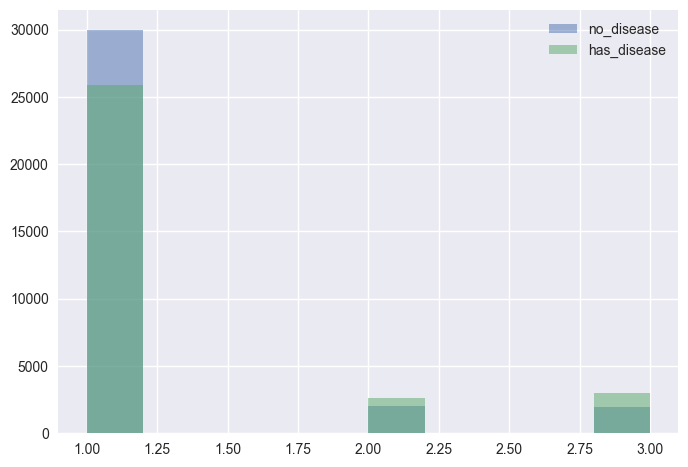

In [357]:
no_disease = df[df['cardio'] == 0]['gluc']
has_disease = df[df['cardio'] == 1]['gluc']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

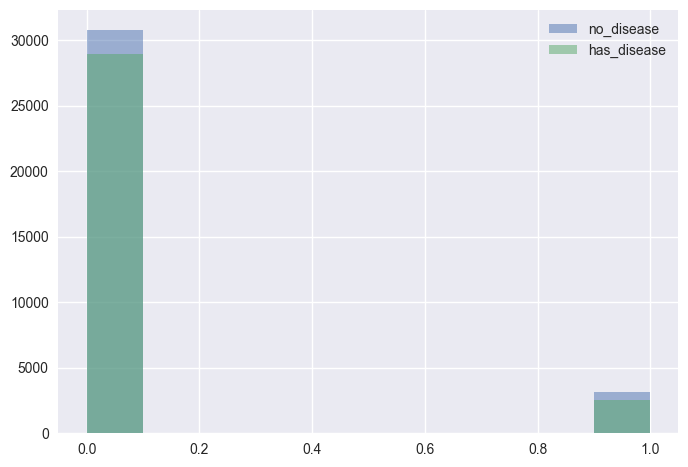

In [358]:
no_disease = df[df['cardio'] == 0]['smoke']
has_disease = df[df['cardio'] == 1]['smoke']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

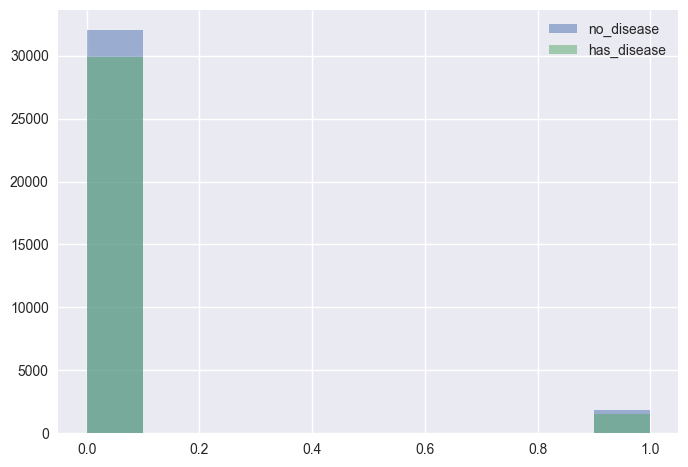

In [359]:
no_disease = df[df['cardio'] == 0]['alco']
has_disease = df[df['cardio'] == 1]['alco']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

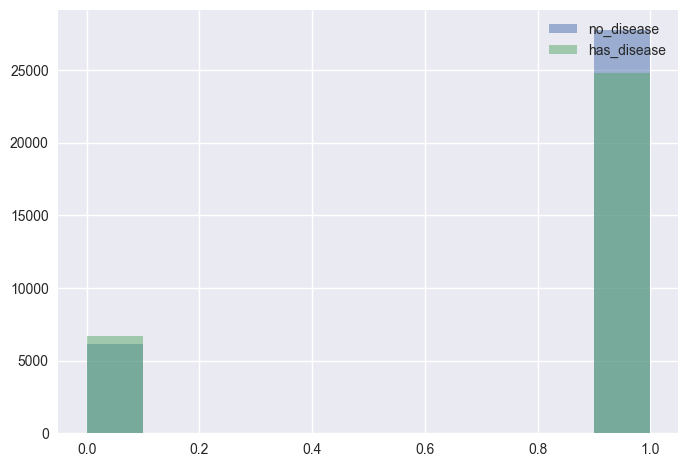

In [360]:
no_disease = df[df['cardio'] == 0]['active']
has_disease = df[df['cardio'] == 1]['active']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

The is a significant skew in the data regarding the last 5 variables. Generally we may conclude that for the most part our data include people with normal cholesterol and glucose levels that by in large are physically active, do not smoke or consume alcohol.

 Note that apart from their obvious skew all these variables have the drawback that they are very vague with no clear definition of what is met as a physically active person. Also there is no doze related to alcohol consumption or smoking, which we would imagine matters for the presence/absence of cv diseases.      

Let us compile the physically active, smoking and alcohol variables into a third variable, which we shall call "lifestyle". First let switch the values in the physically active column so that 0 indicate active and 1 indicate inactive

In [361]:
df['inactive'] = df['active'] - 1
df['inactive'] = df['inactive'].replace(-1, 1)

In [362]:
df['lifestyle'] = df['inactive'] + df['smoke'] + df['alco']

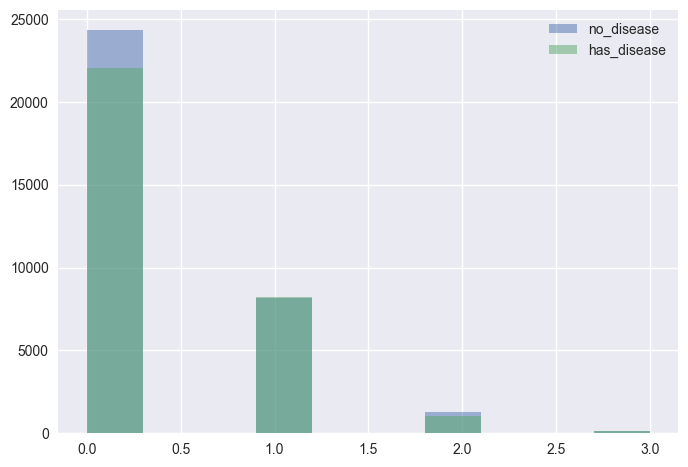

In [363]:
no_disease = df[df['cardio'] == 0]['lifestyle']
has_disease = df[df['cardio'] == 1]['lifestyle']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [364]:
df['lifestyle'].value_counts() 

lifestyle
0    46378
1    16384
2     2377
3      253
Name: count, dtype: int64

This variable looks better, more then 20% of the people have at least one of the three bad habits, 2 300 have two and only 253 are smoking, drinking and inactive  

Let us look at the blood pressure category, which as we may see in the readme takes on 1 of 4 categories.

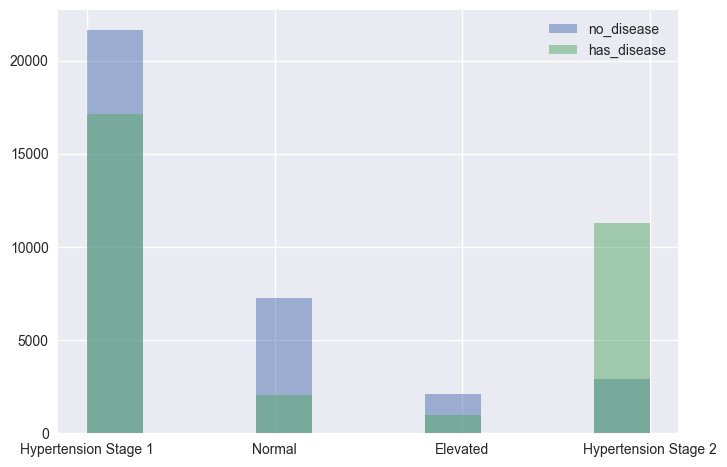

In [365]:
no_disease = df[df['cardio'] == 0]['bp_category']
has_disease = df[df['cardio'] == 1]['bp_category']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

Let us change this variable so that each category takes on a integer from 1 to 4, so we can plot in a correlation matrix later on.   

In [366]:
df['bp_factor'] = pd.factorize(df['bp_category'])[0]

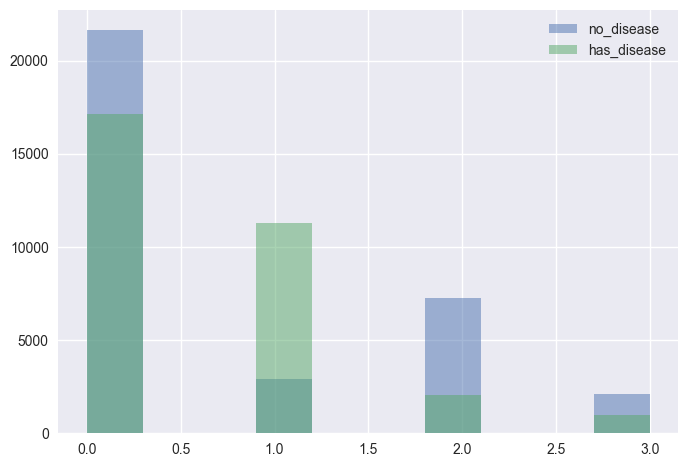

In [367]:
no_disease = df[df['cardio'] == 0]['bp_factor']
has_disease = df[df['cardio'] == 1]['bp_factor']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

Also the body-mass index, which is derived from height and weight  

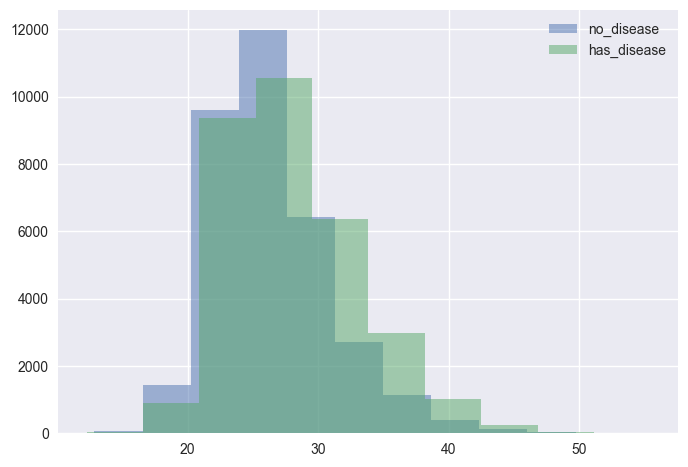

In [368]:
no_disease = df[df['cardio'] == 0]['bmi']
has_disease = df[df['cardio'] == 1]['bmi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [369]:
df = remove_outliers(df, ['bmi'])

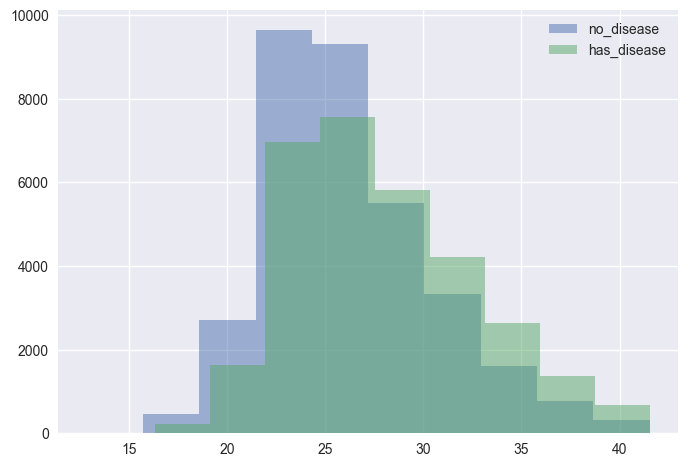

In [370]:
no_disease = df[df['cardio'] == 0]['bmi']
has_disease = df[df['cardio'] == 1]['bmi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

There are two redundant columns, 'age_years' which is a derivative of the age column, the 'bp_category' and 'bp_category_encoded', since we have this variable factorized and finally inactive column, which we used to define our lifestyle column. Lets drop those. 

In [371]:
df = df.drop(['age_years', 'inactive', 'bp_category', 'bp_category_encoded'], axis=1)

### Feature selection

Since our data is small we will go ahead and use a correlation matrix to select the best features, based on their correlation with the target. If our dataset where large we might consider some dimension reduction technique like PCA or mass feature selection like Boruta or LASSO.

Never the less correlation among variables should be always considered as it may lead to 
multicollinearity. 
  

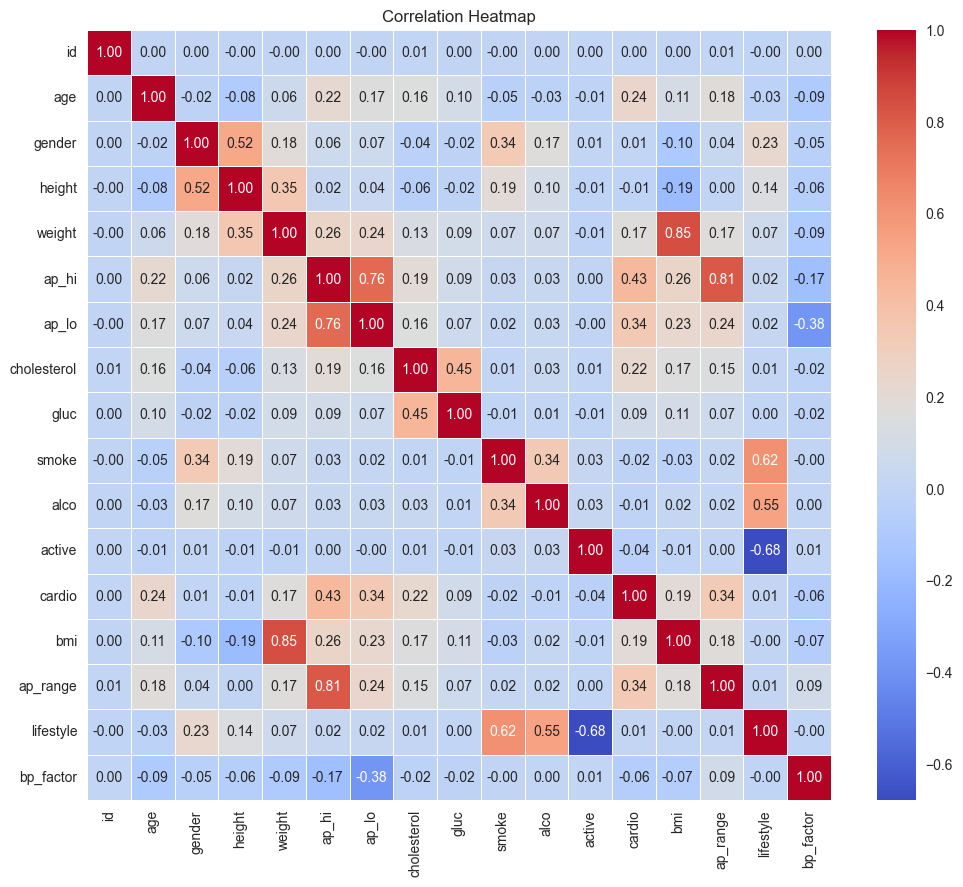

In [372]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

From the corr plot we can see that ap_hi has the strongest correlation with the target variable, better then that of ap_lo or the ap_range variable we defined. Since these three are highly correlated with each other, we shall use ap_hi. Weight and bmi are strongly correlated and the latter has in turn a higher correlation with teh target, hence we will use the bmi. Finally our lifestyle variable has an insignificant positive correlation with the target. Seeming smoke, alco and especially active work better on their own. Gluc and cholesterol are correlated, but since the index us below 0.5, we may include both variables.

All and all this leaves us with 9 variables: ap_hi, bp_factor, bmi, smoke, alco, active, age, gluc and cholesterol.

To note in my estimate this dataset would not be sufficient for a real life situation, some of the variables are very skewed and the proper approach would be to go collect more data. Never the less since this is a demonstrative analysis we shall proceed to modeling.   

### Compare several classification models

#### Train - Test split

Before proceeding further, we wish to split our data into a training set and a testing set. We will first need to separate features from target and then we will make use of sklearn's train_test_split() function. Since the data is relatively small we will choose to keep 30% of our data for final testing of our model.

In [373]:
def XY_split(df):
    '''Define a function for spliting the features and the targe'''
    Y = df['cardio']
    X = df.drop(['cardio'], axis = 1)
    return X, Y

In [374]:
X, Y = XY_split(df) 

In [375]:
# Train-test split (30% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [376]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

45355 19439 45355 19439


Now let us compare 5 classification models:
1. Logistic regression - probably the most widely used mode for classification problems
2. K-means Nearest Neighbor 
3. Decision tree
4. Random forest
5. Gradient Boosting machine (GBM)

Note that we will compare the models using a 10-fold cross validation approach using the train data and save the test data only for our final decision after parameter tunning.

As teh 'scoring' argument for the assessment of the model's predictive power we will use the area under the ROC curve, which is a standard metric for assessing classifiers. The full list of [metrics and scoring: quantifying the quality of predictions.](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions) is in the scikit-lear documentation.

At the final stage of comparison we will compare several metrics but for our initial choice of models and parameter tunning the AUC will do.    

In [383]:
seed = 34

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.788417 (0.006778)
ScaledRF: 0.777497 (0.005191)
ScaledKNN: 0.735633 (0.007219)
ScaledDT: 0.629967 (0.007607)
ScaledGBM: 0.797357 (0.006268)


We notice that the lone Decision Tree had the least classification power, followed by the KNN, while the Logistic regression, Random forest and GBM have a very close AUC. Let us continue with parameter tuning. 

#### Hyperparameter tuning of GBM regression

There are two types of hyperparameters in GBMs we might consider adjusting. Boosting parameters, which are related to the gradient such as leaning rate and n_estimators. The others are tree based hyperparameters like max_depth, num_samples_split, min_samples_leaf. We will consider each ot these and tune one hyperparameter at a time. Most of my parameter tunning is based on this [article.](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)   

First lets right a helpful function for parameter tunning, which takes as parameters the model, x, y datasets, the hyperparameter in question and a list of the values we want to check.

In [384]:
def model_tunning(model,x, y, hyperparameter, values):
    seed = 34

    scaler = StandardScaler().fit(x)
    rescaledX = scaler.transform(x)
    param_grid = dict(z=np.array(values))
    param_grid[hyperparameter] = param_grid['z']
    del param_grid['z']
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    grid = HalvingGridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='roc_auc', cv=kfold, random_state=0)
    grid_result = grid.fit(rescaledX, y)
#    print(grid_result.best_params_ )
#    print(grid_result.best_score_) 

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 



**Number of estimators**

Here we will consider number of estimators of 50, 100, 200, 300 and 400 for the GBM using 10 fold cross-validation and the AUC to determine the best number of estimators.

In [385]:
model_tunning(GradientBoostingClassifier(random_state=21), 
              X_train, y_train, 'n_estimators', [50, 100, 200])

Best: 0.796154 using {'n_estimators': 50}


We can see that 50 estimators works best, so from now one we will set n_estimators to 50

**Learning rate**

The default value of the learning rate in the GBM is 0.1, we can try to lower and two higher for start 0.05, 0.075, 0.1, 0.25 and 0.5 

In [386]:
model_tunning(GradientBoostingClassifier(random_state=21, n_estimators=50), 
              X_train, y_train, 'learning_rate', [0.05,0.075,0.1,0.25,0.5])

Best: 0.796154 using {'learning_rate': 0.1}


We see that the best learning rate is 0.1 for the further tunning this parameter will be set as 0.1

**Max depth**

In GBMs the smaller the trees (that is with few splits) the better. Our default has been 3 so far, lets consider, 1, 2, 3, 4 and 5.

In [387]:
model_tunning(GradientBoostingClassifier(random_state=21, n_estimators=50, 
                                         learning_rate=0.1), 
              X_train, y_train, 'max_depth', [1,2,3,4,5])

Best: 0.797404 using {'max_depth': 4}


**Min sample leaf**

The default values is 1 min_samples_leaf is 1, so let us consider 2 and 3 as well.

In [388]:
model_tunning(GradientBoostingClassifier(random_state=21, n_estimators=50,
                                         max_depth = 4, 
                                         learning_rate=0.1), 
              X_train, y_train, 'min_samples_leaf', [1,2,3,4,5])

Best: 0.797455 using {'min_samples_leaf': 5}


We see the min_samples_leaf of 5 works best